## Import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DSML/DACON/LG\ Aimers/3기/Online

/content/drive/MyDrive/DSML/DACON/LG Aimers/3기/Online


In [4]:
import random
import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder

## Hyperparameter Setting

In [5]:
CFG = {
    'TRAIN_WINDOW_SIZE':7, # 7일치로 학습
    'PREDICT_SIZE':21, # 21일치 예측
    'LEARNING_RATE':1e-4,
    'SEED':41
}

In [7]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정

## 데이터 불러오기

In [8]:
train_data = pd.read_csv('./data/train.csv').drop(columns=['ID', '제품'])

## 데이터 전처리

In [37]:
trans_data = train_data.drop(columns=['대분류', '중분류', '소분류', '브랜드']).transpose()
trans_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889
2022-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-04,0,0,0,0,0,0,7,0,15,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-05,0,0,0,0,0,0,21,0,16,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-06,0,0,0,0,0,0,16,0,23,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-07,0,0,0,0,0,0,18,0,12,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-08,0,0,0,0,0,0,19,0,9,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-09,0,0,0,0,0,0,21,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10,0,0,0,0,0,0,18,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Create training and testing data

In [120]:
ID = 0

sample = pd.DataFrame({
    'date': pd.to_datetime(trans_data.index),
    'sales': trans_data.iloc[:,ID].values
})

In [55]:
train_start_dt = '2022-01-01'
test_start_dt = '2023-01-01'

In [88]:
train_data = sample[(sample['date'] >= train_start_dt) & (sample['date'] < test_start_dt)]

train_X = train_data['date']
train_y = train_data['sales']

In [118]:
test_data = sample[sample['date'] >= test_start_dt]

test_X = test_data['date']
test_y = np.array(test_data['sales'].values)

In [93]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("RBF_SVM", SVR(kernel="rbf", C=10, epsilon=0.05))
])
model.fit(train_X.values.reshape(-1, 1), train_y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('RBF_SVM', SVR(C=10, epsilon=0.05))])

In [94]:
pred = model.predict(test_X.values.reshape(-1, 1))

In [124]:
from sklearn.metrics import mean_squared_error

err = mean_squared_error(pred, test_y)
print(err)

13.469139689350877


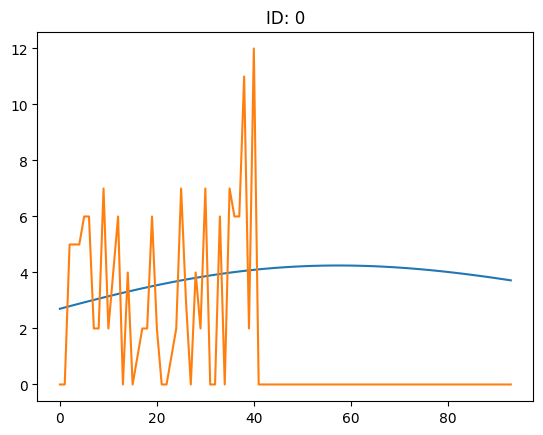

In [126]:
import matplotlib.pyplot as plt

plt.title(f"ID: {ID}")
plt.plot(pred)
plt.plot(test_y)
plt.show()

In [132]:
pred[pred < 0] = 0

In [130]:
pred[0] = -1

In [136]:
int_pred = np.round(pred)
int_pred

array([0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [135]:
pred

array([0.        , 2.7495818 , 2.79552644, 2.84117149, 2.88648885,
       2.93145062, 2.97602912, 3.02019693, 3.06392691, 3.10719222,
       3.14996639, 3.1922233 , 3.23393724, 3.27508291, 3.31563547,
       3.35557055, 3.39486428, 3.43349332, 3.47143488, 3.50866672,
       3.54516721, 3.58091533, 3.6158907 , 3.65007356, 3.68344487,
       3.71598624, 3.74767998, 3.77850915, 3.80845753, 3.83750962,
       3.86565072, 3.89286689, 3.91914494, 3.94447251, 3.96883802,
       3.9922307 , 4.01464059, 4.03605854, 4.05647624, 4.0758862 ,
       4.09428173, 4.11165701, 4.12800702, 4.14332756, 4.15761529,
       4.17086766, 4.18308296, 4.19426027, 4.2043995 , 4.21350134,
       4.2215673 , 4.22859966, 4.23460147, 4.23957656, 4.24352951,
       4.24646563, 4.24839098, 4.24931233, 4.24923716, 4.24817363,
       4.24613057, 4.24311749, 4.23914451, 4.23422241, 4.22836255,
       4.2215769 , 4.21387798, 4.20527888, 4.19579322, 4.18543513,
       4.17421922, 4.1621606 , 4.14927481, 4.13557784, 4.12108